In [30]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RepeatedKFold

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('./Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## EDA

In [31]:
df.shape

(10999, 12)

In [32]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [33]:
df['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [34]:
df['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [35]:
df['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [36]:
df['Gender'].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

In [37]:
df["Reached.on.Time_Y.N"].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [38]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [39]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [40]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [41]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [42]:
df.groupby(["Customer_care_calls"])["Reached.on.Time_Y.N"].agg('mean')

Customer_care_calls
2    0.652038
3    0.625117
4    0.597695
5    0.584192
6    0.516288
7    0.516260
Name: Reached.on.Time_Y.N, dtype: float64

In [43]:
df["Customer_care_calls"] = df["Customer_care_calls"].replace({2:"CC1", 3:"CC1", 4:"CC2", 5:"CC2", 6:"CC3", 7:"CC3"})

In [44]:
df.groupby(["Cost_of_the_Product"])["Reached.on.Time_Y.N"].agg('mean')

Cost_of_the_Product
96     1.000000
97     0.571429
98     0.642857
99     0.200000
100    0.444444
         ...   
306    0.500000
307    0.357143
308    0.450000
309    0.466667
310    0.411765
Name: Reached.on.Time_Y.N, Length: 215, dtype: float64

In [45]:
df.groupby(["Prior_purchases"])["Reached.on.Time_Y.N"].agg('mean')

Prior_purchases
2     0.625240
3     0.640708
4     0.543387
5     0.498834
6     0.559715
7     0.676471
8     0.648438
10    0.573034
Name: Reached.on.Time_Y.N, dtype: float64

In [46]:
df.groupby(["Gender"])["Reached.on.Time_Y.N"].agg('mean')

Gender
F    0.594409
M    0.599010
Name: Reached.on.Time_Y.N, dtype: float64

In [48]:
X, y = df[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']], df[['Reached.on.Time_Y.N']]

## 전처리 및 정제

In [49]:
ord = OrdinalEncoder()
ord_feat = ord.fit_transform(X[['Customer_rating']])

ohe = OneHotEncoder()
cat_feat = ohe.fit_transform(X[['Product_importance', "Customer_care_calls"]]).toarray()

scaler = MinMaxScaler()
num_feat = scaler.fit_transform(X[['Cost_of_the_Product', 'Prior_purchases','Discount_offered', 'Weight_in_gms']])

In [50]:
X_ = np.concatenate((cat_feat, num_feat, ord_feat), axis=1)
y_ = np.ravel(y)

In [51]:
features_list = ohe.get_feature_names_out().tolist() + ['Cost_of_the_Product', 'Prior_purchases','Discount_offered', 'Weight_in_gms'] + ['Customer_rating']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.2, random_state = 42)

In [53]:
def evaluate(y_test, y_pred):
    print(f"Accuracy : {accuracy_score(y_test, y_pred)}")
    print(f"ROC AUC  : {roc_auc_score(y_test, y_pred)}") 
    
    plt.figure(figsize=(20,5));
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.subplot(1, 2, 1)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
    plt.ylabel('Actuals')
    plt.xlabel('Predictions')
    #plt.show()
    
    plt.subplot(1, 2, 2)
    fpr, tpr, thresholds = roc_curve(y_test , y_pred)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

## 모델링

###  Logistic Regression

Accuracy : 0.6263636363636363
ROC AUC  : 0.5730773347032256


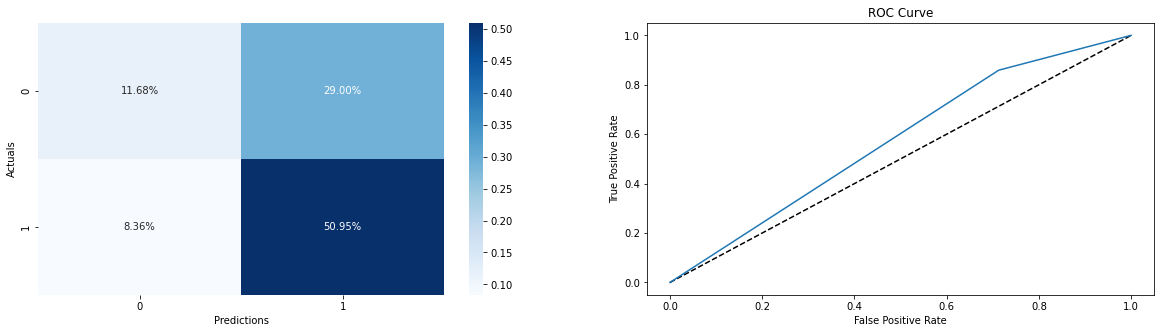

In [54]:
lr = LogisticRegression(penalty='l2', C=0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

evaluate(y_test, y_pred)

### XGBoost

Accuracy : 0.6868181818181818
ROC AUC  : 0.7214473768702242


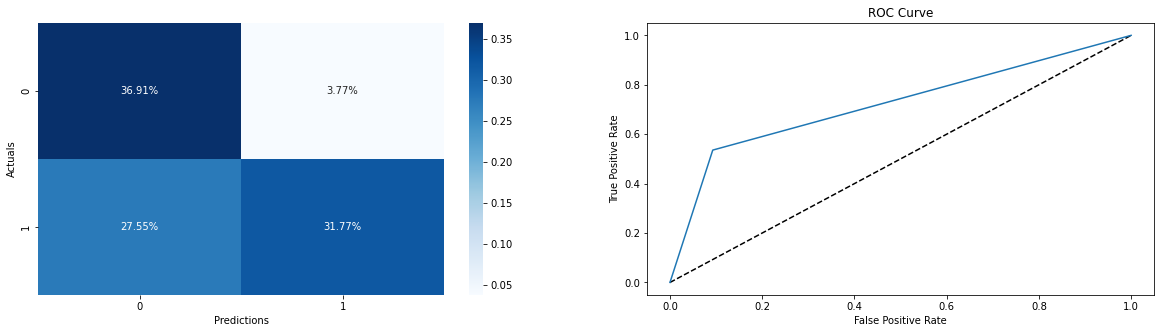

In [55]:
xgb = XGBClassifier(learning_rate=0.02)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

evaluate(y_test, y_pred)

### Random Forest

Accuracy : 0.6695454545454546
ROC AUC  : 0.6675720798818467


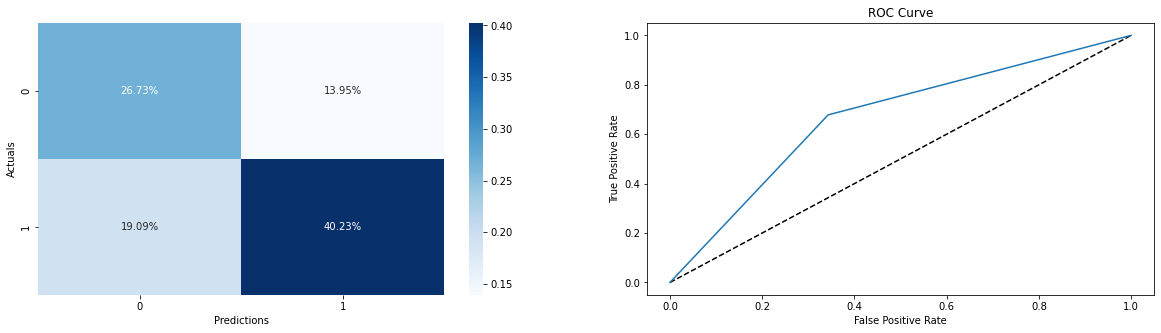

In [56]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

evaluate(y_test, y_pred)

### Logistic Regression with L1 and L2 Regularization

Accuracy : 0.6395454545454545
ROC AUC  : 0.6212226289090093


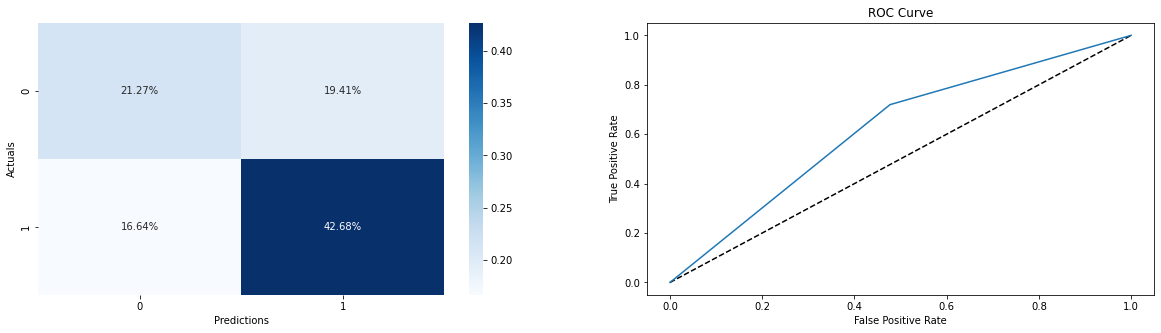

In [57]:
lrc = LogisticRegressionCV(cv=3, penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], solver='saga')

lrc.fit(X_train, y_train)
y_pred = lrc.predict(X_test)

evaluate(y_test, y_pred)